In [43]:
import pandas as pd

def average_results(input_csv, output_csv=None):
    """
    This function reads a CSV file, averages the numeric values by grouping by 'N',
    and optionally saves the results to a new CSV file.

    Parameters:
    - input_csv (str): The path to the input CSV file.
    - output_csv (str, optional): The path to save the averaged results CSV file. If None, the result won't be saved.

    Returns:
    - pd.DataFrame: The averaged results.
    """
    # Read the CSV file
    df = pd.read_csv(input_csv)
    
    # Group by 'N' and compute averages
    df_avg = df.groupby('N').mean()

    # Reset index to have 'N' as a column
    df_avg = df_avg.reset_index()

    # Save the averaged results if an output file is provided
    if output_csv:
        df_avg.to_csv(output_csv, index=False)
    
    return df_avg


In [44]:
df_avg_bpnextfit = average_results('results_bpnextfit.csv')
df_avg_bpworstfit = average_results('results_bpworstfit.csv')
df_avg_bpbestfit = average_results('results_bpbestfit.csv')
df_avg_bpfirstfit = average_results('results_bpfirstfit.csv')

df_avg_bpbestfit

,N,TotalFileSize,DiskSize,MinDisks,MaxDisks,DisksUsed,Waste,CPUTime
0,100,4.726509e+07,1000000.0,48.0,100.0,49.0,1734912.0,0.000027
1,500,2.478352e+08,1000000.0,248.0,500.0,251.0,3164807.0,0.000122
2,1000,4.993848e+08,1000000.0,500.0,1000.0,505.0,5615153.0,0.000260
3,5000,2.494949e+09,1000000.0,2495.0,5000.0,2508.0,13051250.0,0.001479
4,10000,4.992265e+09,1000000.0,4993.0,10000.0,5009.0,16735160.0,0.003224
5,50000,2.501999e+10,1000000.0,25020.0,50000.0,25090.0,70006777.0,0.018663
6,100000,4.994037e+10,1000000.0,49940.8,100000.0,50019.4,79034017.0,0.044641
7,500000,2.497365e+11,1000000.0,249736.8,500000.0,249912.4,175946426.0,0.345077
8,1000000,4.999126e+11,1000000.0,499913.0,1000000.0,500202.0,289430860.4,0.768541


In [45]:
# df_avg = average_results('results_bpnextfit.csv', 'results_bpnextfit_avg.csv')

In [46]:
import pandas as pd

def combine_and_export_algorithms(dfs, output_csv=None):
    """
    This function combines multiple dataframes, adding the algorithm name, and exports the results.
    
    Parameters:
    - dfs (dict): A dictionary of dataframes with keys as algorithm names.
    - output_csv (str, optional): The path to save the combined CSV file. If None, no file will be saved.
    
    Returns:
    - pd.DataFrame: The combined dataframe with algorithm names, N, and Waste values.
    """
    combined_results = []

    for algorithm, df in dfs.items():
        # Add an 'Algorithm' column to the dataframe
        df['Algorithm'] = algorithm
        # Keep only 'N' and 'Waste' columns along with 'Algorithm'
        df_combined = df[['Algorithm', 'N', 'Waste', "CPUTime"]]
        combined_results.append(df_combined)
    
    # Concatenate all the dataframes into one
    final_combined_df = pd.concat(combined_results, ignore_index=True)
    
    # Save the result if output CSV is provided
    if output_csv:
        final_combined_df.to_csv(output_csv, index=False)
    
    return final_combined_df


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_waste_comparison(df_combined):
    """
    This function plots a comparison of the 'Waste' values between different algorithms.
    
    Parameters:
    - df_combined (pd.DataFrame): The combined dataframe containing algorithm, N, and Waste values.
    """
    plt.figure(figsize=(10, 6))
    
    # Create a boxplot to show the distribution of Waste for each algorithm
    sns.boxplot(data=df_combined, x='Algorithm', y='Waste')
    
    # Set plot labels and title
    plt.xlabel('Algorithm')
    plt.ylabel('Waste')
    plt.title('Waste Comparison Between Algorithms')
    
    # Display the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [48]:
dfs = {
    'BP NextFit': df_avg_bpnextfit,
    'BP WorstFit': df_avg_bpworstfit,
    'BP BestFit': df_avg_bpbestfit,
    'BP FirstFit': df_avg_bpfirstfit
}

# Combine and export the results to a CSV file
combined_df = combine_and_export_algorithms(dfs, output_csv='combined_results.csv')

# dataframe to csv
combined_df.to_csv('combined_results.csv', index=False)

In [49]:
# load combined results
combined_df = pd.read_csv('combined_results.csv')
combined_df

,Algorithm,N,Waste,CPUTime
0,BP NextFit,100,1.373491e+07,0.000012
1,BP NextFit,500,6.916481e+07,0.000061
2,BP NextFit,1000,1.416152e+08,0.000131
3,BP NextFit,5000,7.320512e+08,0.000819
4,BP NextFit,10000,1.455735e+09,0.001638
5,BP NextFit,50000,7.245007e+09,0.012386
6,BP NextFit,100000,1.448243e+10,0.025095
7,BP NextFit,500000,7.253255e+10,0.227829
8,BP NextFit,1000000,1.449912e+11,0.534067
9,BP WorstFit,100,1.734912e+06,0.000020


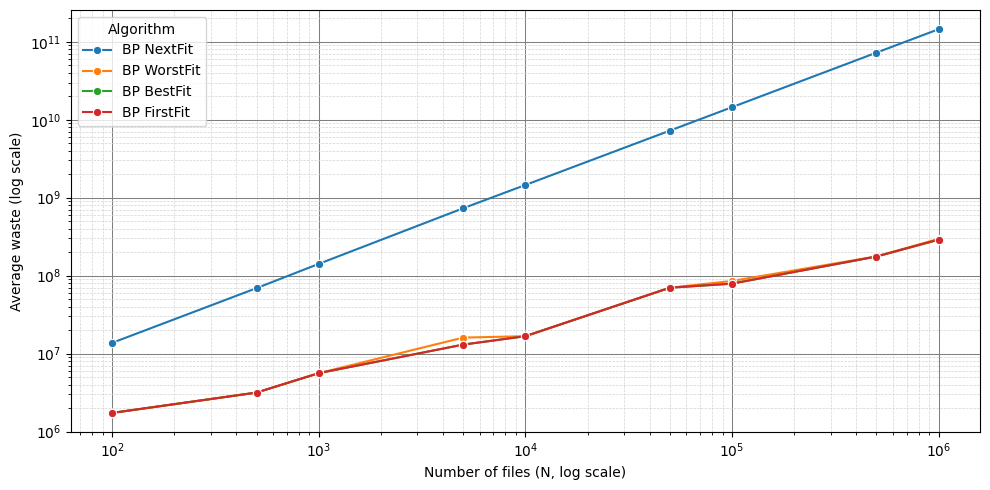

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_waste_over_N(df_combined,filename='waste_over_N.pdf'):
    """
    This function plots the 'Waste' values over 'N' for different algorithms.

    Parameters:
    - df_combined (pd.DataFrame): The combined dataframe containing algorithm, N, and Waste values.
    """
    plt.figure(figsize=(10, 5))

    # Create a line plot with 'N' on the x-axis, 'Waste' on the y-axis, and separate lines for each 'Algorithm'
    sns.lineplot(data=df_combined, x='N', y='Waste', hue='Algorithm', marker='o')

    # Set both axes to log scale
    plt.xscale('log')
    plt.yscale('log')

    # Set plot labels and title
    plt.xlabel('Number of files (N, log scale)')
    plt.ylabel('Average waste (log scale)')
    # plt.title('Waste vs. Number of Files (N) [Log-Log Scale]')

    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth=0.75, color='gray')
    plt.grid(which='minor', linestyle='--', linewidth=0.5, color='lightgray')

    # Display the plot with a nice layout
    plt.legend(title='Algorithm')
    plt.tight_layout()

    plt.savefig(filename, format='pdf')

    plt.show()
plot_waste_over_N(combined_df, filename='q21_waste_vs_NoF.pdf')


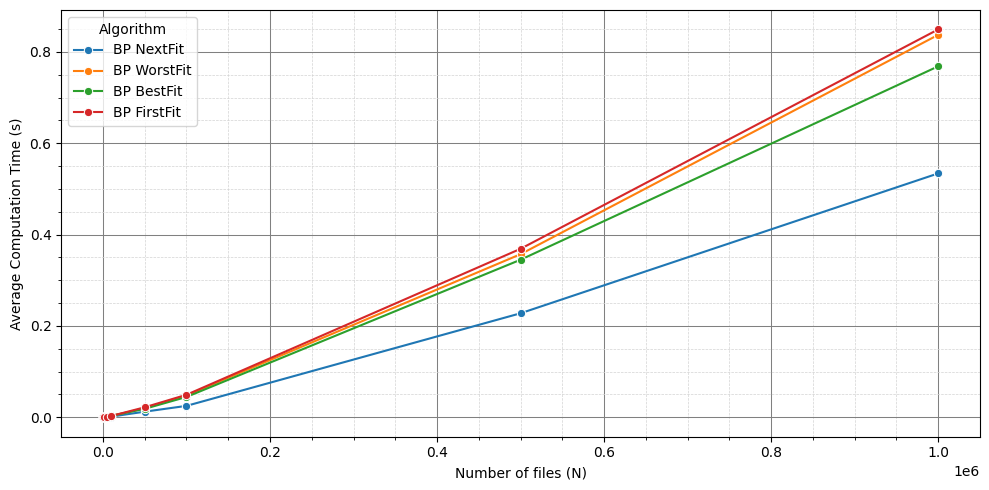

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_comp_time_over_N(df_combined,filename='comp_time_over_N.pdf'):
    """
    This function plots the 'Waste' values over 'N' for different algorithms.

    Parameters:
    - df_combined (pd.DataFrame): The combined dataframe containing algorithm, N, and Waste values.
    """
    plt.figure(figsize=(10, 5))

    # Create a line plot with 'N' on the x-axis, 'Waste' on the y-axis, and separate lines for each 'Algorithm'
    sns.lineplot(data=df_combined, x='N', y='CPUTime', hue='Algorithm', marker='o')

    # # Set both axes to log scale
    # plt.xscale('log')
    # plt.yscale('log')

    # Set plot labels and title
    plt.xlabel('Number of files (N)')
    plt.ylabel('Average Computation Time (s)')
    # plt.title('CPU time vs. number of files (N)')

    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth=0.75, color='gray')
    plt.grid(which='minor', linestyle='--', linewidth=0.5, color='lightgray')

    # Display the plot with a nice layout
    plt.legend(title='Algorithm')
    plt.tight_layout()

    plt.savefig(filename, format='pdf')

    plt.show()
plot_comp_time_over_N(combined_df, filename='q21_cpu_vs_NoF.pdf')
